Creating and Training the convolutional neural network from scratch using the Fer3013 dataset which contains the following 7 different emotions/gestures
1. Angry
2. Disgust
3. Fear
4. Happy 
5. Sad
6. Surprise
7. Neutral 

Loading the necessary Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline 

MOunting the google drive where data is kept in "archive.zip" file.

Unzipping the file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from zipfile import ZipFile
file_name='/content/drive/My Drive/archive.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
df=pd.read_csv('fer2013.csv')

In [6]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
df.shape

(35887, 3)

In [8]:
df['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

The file has three different categories for data i.e. , data for
1. Training
2. Validation
3. Testing 

In [10]:
training_data=df['pixels'][(df['Usage']=='Training') ]
training_data=np.array(list(map(str.split,training_data)),np.float32)

val_data=df['pixels'][(df['Usage']=='PublicTest') ]
val_data=np.array(list(map(str.split,val_data)),np.float32)


testing_data=df['pixels'][(df['Usage']== 'PrivateTest')]
testing_data=np.array(list(map(str.split,testing_data)),np.float32)



In [11]:
print(training_data.shape)
print(training_data)


(28709, 2304)
[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]


In [12]:
print(val_data.shape)
print(val_data)


(3589, 2304)
[[254. 254. 254. ...  42. 129. 180.]
 [156. 184. 198. ... 172. 167. 161.]
 [ 69. 118.  61. ...  88.  87.  90.]
 ...
 [255. 255. 255. ...  48.  50.  46.]
 [ 33.  25.  31. ...   4.   5.   4.]
 [ 61.  63.  59. ... 113. 165. 180.]]


In [13]:
#rescaling the validation data
val_data=val_data/255.0
val_data


array([[0.99607843, 0.99607843, 0.99607843, ..., 0.16470589, 0.5058824 ,
        0.7058824 ],
       [0.6117647 , 0.72156864, 0.7764706 , ..., 0.6745098 , 0.654902  ,
        0.6313726 ],
       [0.27058825, 0.4627451 , 0.23921569, ..., 0.34509805, 0.34117648,
        0.3529412 ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.1882353 , 0.19607843,
        0.18039216],
       [0.12941177, 0.09803922, 0.12156863, ..., 0.01568628, 0.01960784,
        0.01568628],
       [0.23921569, 0.24705882, 0.23137255, ..., 0.44313726, 0.64705884,
        0.7058824 ]], dtype=float32)

splitting the labels into three categories based on their Usage

In [14]:
y_train=df['emotion'][(df['Usage']=='Training') ]
y_train=np.array(y_train)
y_train

array([0, 0, 2, ..., 4, 0, 4])

In [15]:
y_val=df['emotion'][(df['Usage']=='PublicTest')]
y_val=np.array(y_val)
y_val

array([0, 1, 4, ..., 4, 4, 4])

In [16]:
y_test=df['emotion'][(df['Usage']=='PrivateTest')]
y_test=np.array(y_test)
y_test

array([0, 5, 6, ..., 0, 3, 2])

In [17]:
#Reshaping the data so as to fit according to the CNN model 

training_data=training_data.reshape(training_data.shape[0],48,48,1)
val_data=val_data.reshape(val_data.shape[0],48,48,1)
testing_data=testing_data.reshape(testing_data.shape[0],48,48,1)

print(training_data.shape)
print(val_data.shape)
print(testing_data.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)


In [18]:

num_classes = 7

emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
emotion_labels=np.array(emotion_labels)

print(emotion_labels)

['Angry' 'Disgust' 'Fear' 'Happy' 'Sad' 'Surprise' 'Neutral']


Happy


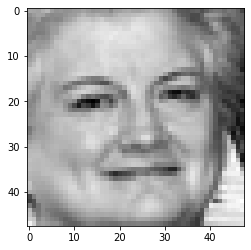

In [19]:
plt.imshow(training_data[100].reshape(48,48),cmap='gray')
print(emotion_labels[y_train[100]])

Fear


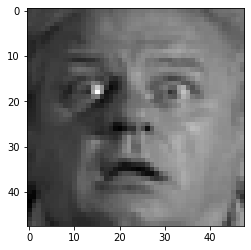

In [20]:
plt.imshow(val_data[1000].reshape(48,48),cmap='gray')
print(emotion_labels[y_val[1000]])

In [21]:
# performing data agumentation for better training of the model by applying various methods such as rescaling, rotation, shift, zoom, and many more....presented below

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0, # rescaling
                                   rotation_range = 10,  
                                   width_shift_range = 0.1,
                                   fill_mode='nearest',
                                   #validation_split = 0.2,
                                   height_shift_range = 0.1,
                                   shear_range = 0.1,
                                   #zoom_range = [0.5,1.0],
                                   #brightness_range=(0.3, 0.9),
                                   #channel_shift_range=150.0,
                                   vertical_flip = True ,
                                   horizontal_flip = True
                                   )




train_datagen.fit(training_data)



In [23]:
#creating the model 

input_size=(48,48,1)

model=tf.keras.Sequential()

# Block-1
model.add(tf.keras.layers.Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu',input_shape=input_size))
model.add(tf.keras.layers.Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))

# Block-2
model.add(tf.keras.layers.Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',input_shape=input_size))
model.add(tf.keras.layers.Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.MaxPooling2D(strides=(2,2)))

# Block-3
model.add(tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.MaxPooling2D(strides=(2,2)))

# Block-4
model.add(tf.keras.layers.Conv2D(512,(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(tf.keras.layers.Conv2D(512,(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.MaxPooling2D(strides=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())

# Dense-1
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.5))

#Dense-2
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.3))

#output layer
model.add(tf.keras.layers.Dense(7,activation='softmax'))


#compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 128)       5

In [24]:
# using early stopping as a callback

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=10, 
                                               verbose=1,
                                               restore_best_weights=True)

# training the model

history = model.fit(train_datagen.flow(training_data, y_train, batch_size=64),
                    steps_per_epoch=training_data.shape[0] // 64,
                    callbacks=[es_callback,],
                    validation_data=(val_data,y_val),
                    epochs = 200, verbose = 1,
                    )

Epoch 1/200
448/448 [==============================] - 33s 74ms/step - loss: 2.1155 - accuracy: 0.2029 - val_loss: 2.5174 - val_accuracy: 0.2494
Epoch 2/200
448/448 [==============================] - 33s 75ms/step - loss: 1.8858 - accuracy: 0.2310 - val_loss: 2.3570 - val_accuracy: 0.2435
Epoch 3/200
448/448 [==============================] - 34s 75ms/step - loss: 1.8159 - accuracy: 0.2592 - val_loss: 12.8399 - val_accuracy: 0.2480
Epoch 4/200
448/448 [==============================] - 33s 75ms/step - loss: 1.7486 - accuracy: 0.2907 - val_loss: 4.3396 - val_accuracy: 0.3221
Epoch 5/200
448/448 [==============================] - 34s 75ms/step - loss: 1.6945 - accuracy: 0.3201 - val_loss: 1.7718 - val_accuracy: 0.2193
Epoch 6/200
448/448 [==============================] - 33s 75ms/step - loss: 1.7235 - accuracy: 0.2973 - val_loss: 10.8453 - val_accuracy: 0.2494
Epoch 7/200
448/448 [==============================] - 33s 75ms/step - loss: 1.6403 - accuracy: 0.3490 - val_loss: 3.8487 - val_

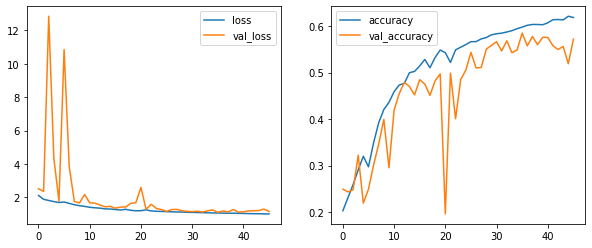

In [25]:
#tracking the losses and accuracy 
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [26]:
#rescaling the testing data
testing_data=testing_data/255.0

In [27]:
# evaluating on the testing data
model.evaluate(testing_data,y_test)

113/113 [==============================] - 1s 10ms/step - loss: 1.0567 - accuracy: 0.5915


[1.0566763877868652, 0.5915296673774719]

Achieved an accuracy of 59.152 % 

In [32]:
#saving the model architechture along with the weights
model.save('Fer2013_cnn.h5') 

In [34]:
from keras.models import load_model

In [35]:
cc=load_model('Fer2013_cnn.h5')

In [38]:
cc.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 128)       5

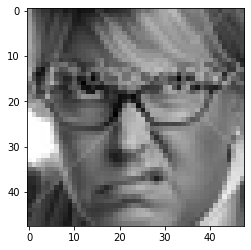

In [44]:
plt.imshow(testing_data[0].reshape(48,48),cmap='gray')

In [42]:
emotion_labels[np.argmax(cc.predict(testing_data[0].reshape(1,48,48,1)))]

'Angry'